In [84]:
#IMPORTING LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [85]:
# loading the data from csv file to a Pandas DataFrame
insurance_dataset = pd.read_csv('insurance.csv')

In [86]:
#printing 1st 5 rows of the data set
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [87]:
# number of rows and columns
insurance_dataset.shape

(1338, 7)

In [88]:
# getting some informations about the dataset
insurance_dataset.info()
print("")
print("Categorical Features:\n Sex\n Smoker\n Region")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB

Categorical Features:
 Sex
 Smoker
 Region


In [89]:
# statistical Measures of the dataset
insurance_dataset.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [90]:
# checking for missing values
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

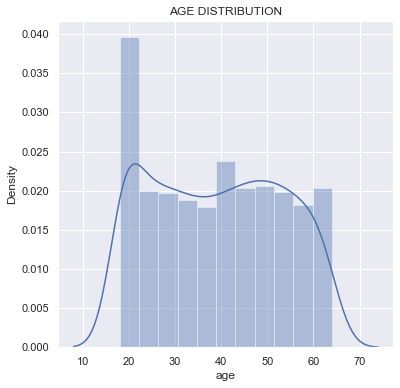

In [91]:
# distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['age'])
plt.title('AGE DISTRIBUTION')
plt.show()

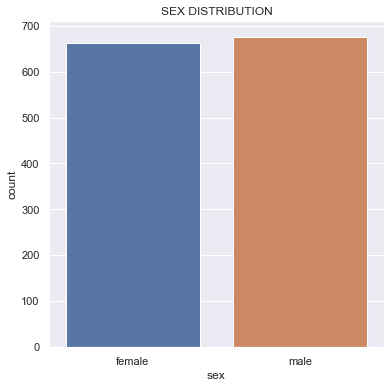

In [92]:
# Gender column
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=insurance_dataset)
plt.title('SEX DISTRIBUTION')
plt.show()

In [47]:
#COUNTING THE TOTAL NUMBER OF MALES AND FEMALES
insurance_dataset['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

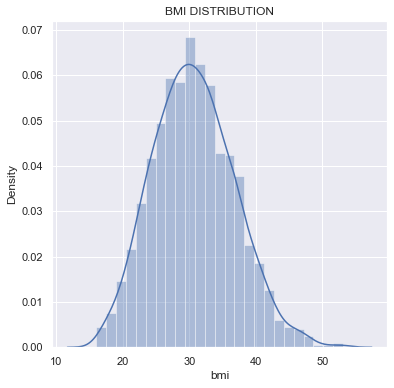

Normal BMI Range --> 18.5 to 24.9


In [48]:
# BMI DISTRIBUTION
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['bmi'])
plt.title('BMI DISTRIBUTION')
plt.show()
print("Normal BMI Range --> 18.5 to 24.9")

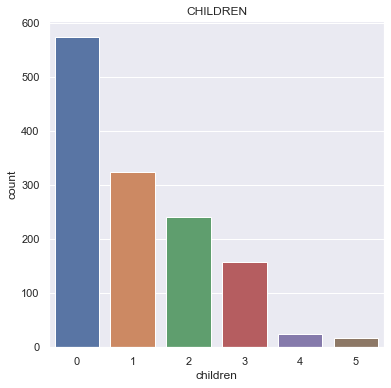

In [49]:
# CHILDREN COLUMN
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=insurance_dataset)
plt.title('CHILDREN')
plt.show()

In [50]:
insurance_dataset['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

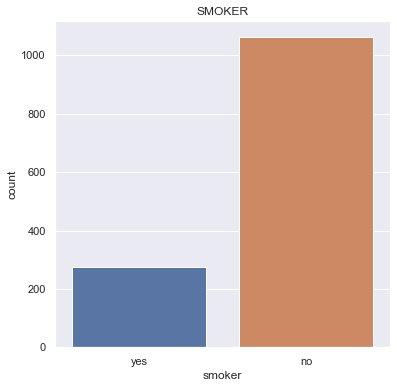

In [51]:
# SMOKER COLUMN
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=insurance_dataset)
plt.title('SMOKER')
plt.show()

In [52]:
insurance_dataset['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

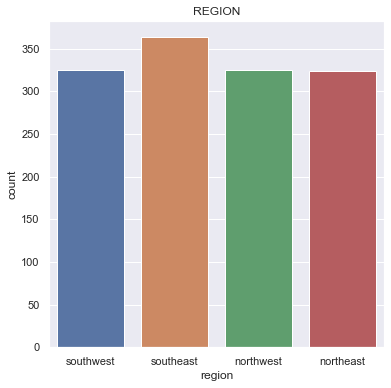

In [53]:
# REGION COLUMN
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=insurance_dataset)
plt.title('REGION')
plt.show()

In [54]:
insurance_dataset['region'].value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

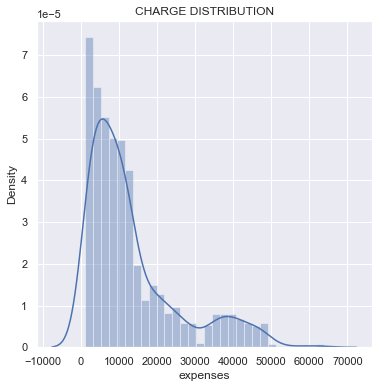

In [55]:
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['expenses'])
plt.title('CHARGE DISTRIBUTION')
plt.show()

In [56]:
print("DATA PREPROCESSING")
print("")
print("Encoding the categorical features as it is easier for the computer to understand numeric values!")

DATA PREPROCESSING

Encoding the categorical features as it is easier for the computer to understand numeric values!


In [66]:
##Converting objects labels into categorical
insurance_dataset[['sex', 'smoker', 'region']] = insurance_dataset[['sex', 'smoker', 'region']].astype('category')
insurance_dataset.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
expenses     float64
dtype: object

In [67]:
##Converting category labels into numerical using LabelEncoder
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
label.fit(insurance_dataset.sex.drop_duplicates())
insurance_dataset.sex = label.transform(insurance_dataset.sex)
label.fit(insurance_dataset.smoker.drop_duplicates())
insurance_dataset.smoker = label.transform(insurance_dataset.smoker)
label.fit(insurance_dataset.region.drop_duplicates())
insurance_dataset.region = label.transform(insurance_dataset.region)
insurance_dataset.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
expenses    float64
dtype: object

In [68]:
X = insurance_dataset.drop(columns='expenses', axis=1)
Y = insurance_dataset['expenses']

In [59]:
print(X)

      age     sex   bmi  children smoker     region
0      19  female  27.9         0    yes  southwest
1      18    male  33.8         1     no  southeast
2      28    male  33.0         3     no  southeast
3      33    male  22.7         0     no  northwest
4      32    male  28.9         0     no  northwest
...   ...     ...   ...       ...    ...        ...
1333   50    male  31.0         3     no  northwest
1334   18  female  31.9         0     no  northeast
1335   18  female  36.9         0     no  southeast
1336   21  female  25.8         0     no  southwest
1337   61  female  29.1         0    yes  northwest

[1338 rows x 6 columns]


In [34]:
print(Y)

0       16884.92
1        1725.55
2        4449.46
3       21984.47
4        3866.86
          ...   
1333    10600.55
1334     2205.98
1335     1629.83
1336     2007.95
1337    29141.36
Name: expenses, Length: 1338, dtype: float64


In [69]:
print("Splitting the data into Training data & Testing Data")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

Splitting the data into Training data & Testing Data
(1338, 6) (1070, 6) (268, 6)


In [62]:
print("Model Training: Multiple Linear Regression")
# loading the Linear Regression model
regressor = LinearRegression()

Model Training: Multiple Linear Regression


In [70]:
regressor.fit(X_train, Y_train)

LinearRegression()

In [71]:
print("MODEL EVALUATION>>>")
# prediction on training data
training_data_prediction =regressor.predict(X_train)

In [73]:
# R squared value
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R squared value : ', r2_train)

R squared value :  0.7515233180624387


In [82]:
print("Building a Predictive System>>>>")
print("")
input_data = (32,1,23.24,0,1,0)

# changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)
print(prediction)

print('THE INSURANCE COST IS:', prediction[0],"USD")

Building a Predictive System>>>>

[3183.9267838]
THE INSURANCE COST IS: 3183.926783803786 USD


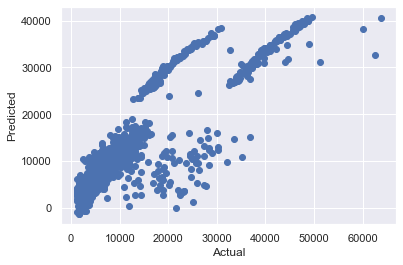

In [93]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()